## Lab 2 - Intro to stan

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
F = len("Dominik")
L = len("Zurek")
F, L

(7, 5)

### Excercise 1 - Generated Quantities Block

In [3]:
%%writefile code_1.stan
data {
  int M;
}

generated quantities {
  real lambda=fabs(normal_rng(0,121));
  int y_sim[M];
  for (k in 1:M) {
    y_sim[k] = poisson_rng(lambda);
  }
}

Overwriting code_1.stan


In [4]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/code_1.stan to exe file /home/code_1
INFO:cmdstanpy:compiled model executable: /home/code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_1.hpp /home/code_1.stan
Warning in '/home/code_1.stan', line 7, column 2: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wn

In [5]:
samples = gen_quant.sample(data={'M': F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
samples.draws().shape

(1000, 1, 10)

In [7]:
samples.column_names

('lp__',
 'accept_stat__',
 'lambda',
 'y_sim[1]',
 'y_sim[2]',
 'y_sim[3]',
 'y_sim[4]',
 'y_sim[5]',
 'y_sim[6]',
 'y_sim[7]')

In [8]:
data = samples.draws()[:,:, 2:]

In [9]:
df = pd.DataFrame(data.reshape((1000, 8)))
df.head()

,0,1,2,3,4,5,6,7
0,28.5342,37.0,24.0,35.0,30.0,25.0,22.0,17.0
1,67.9120,69.0,61.0,71.0,58.0,63.0,82.0,76.0
2,129.1520,123.0,130.0,142.0,124.0,140.0,136.0,141.0
3,157.6340,156.0,161.0,155.0,177.0,145.0,144.0,141.0
4,79.9514,68.0,79.0,81.0,81.0,77.0,86.0,78.0


In [10]:
df.columns = samples.column_names[2:]

In [11]:
df.head()

,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,28.5342,37.0,24.0,35.0,30.0,25.0,22.0,17.0
1,67.9120,69.0,61.0,71.0,58.0,63.0,82.0,76.0
2,129.1520,123.0,130.0,142.0,124.0,140.0,136.0,141.0
3,157.6340,156.0,161.0,155.0,177.0,145.0,144.0,141.0
4,79.9514,68.0,79.0,81.0,81.0,77.0,86.0,78.0


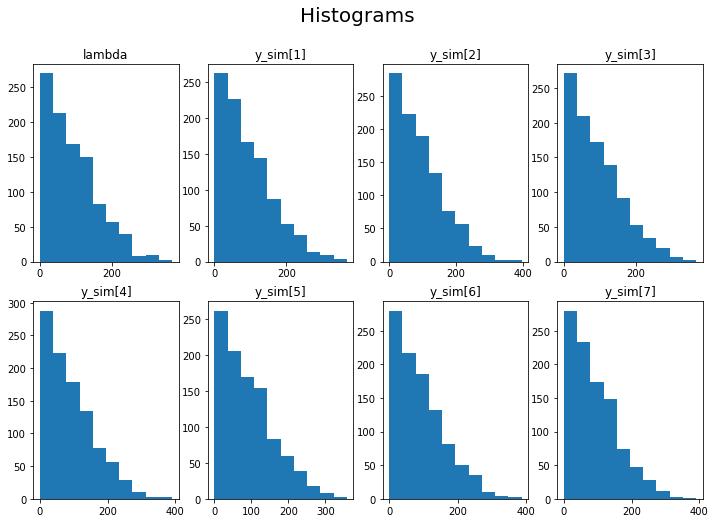

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.hist(df.iloc[:, i])
    ax.set_title(df.columns[i])
plt.suptitle("Histograms", fontsize=20)
plt.show()

### Excercise 2 - Constraints on the data

In [13]:
%%writefile code_2.stan
data {
  int N;
  int y[N];
}

parameters {
  real<lower=0,upper=1> theta;
}

model {
  theta ~ beta(1,1);
  y ~ bernoulli(theta);
}

Overwriting code_2.stan


In [14]:
%%writefile code_3.stan
data {
    int<lower=1> N;
    int<lower=0,upper=1> y[N];
}

parameters {
  real<lower=0,upper=1> theta;
}

model {
    theta ~ beta(1, 1);
    y ~ bernoulli(theta);
}

Overwriting code_3.stan


In [15]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0, 2]})

INFO:cmdstanpy:compiling stan file /home/code_2.stan to exe file /home/code_2
INFO:cmdstanpy:compiled model executable: /home/code_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_2.hpp /home/code_2.stan
Warning in '/home/code_2.stan', line 3, column 2: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wn


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/code_2.stan', line 12, column 2 to column 23)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/code_2', 'id=1', 'random', 'seed=81554', 'data', 'file=/tmp/tmpapi5x0mb/hc4dion2.json', 'output', 'file=/tmp/tmpapi5x0mb/code_2-20230320071416_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpapi5x0mb/code_2-20230320071416_1.csv
 console_msgs (if any):
	/tmp/tmpapi5x0mb/code_2-20230320071416_0-stdout.txt

In [16]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0, 2]})

INFO:cmdstanpy:compiling stan file /home/code_3.stan to exe file /home/code_3
INFO:cmdstanpy:compiled model executable: /home/code_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_3.hpp /home/code_3.stan
Warning in '/home/code_3.stan', line 3, column 4: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wn


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/code_3.stan', line 3, column 4 to column 30)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/code_3.stan', line 3, column 4 to column 30)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/code_3.stan', line 3, column 4 to column 30)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/code_3.stan', line 3, column 4 to column 30)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/code_3', 'id=1', 'random', 'seed=35621', 'data', 'file=/tmp/tmpapi5x0mb/7g7y6i6o.json', 'output', 'file=/tmp/tmpapi5x0mb/code_3-20230320071541_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpapi5x0mb/code_3-20230320071541_1.csv
 console_msgs (if any):
	/tmp/tmpapi5x0mb/code_3-20230320071541_0-stdout.txt

Without constraints on the observed values `y` the model will crash for `[0, 2]`, since `2` is not a possible outcome for the Bernoulli distribution. Adding contraints on the data prevents unnecessary computations by short-circuiting the model's execution in case the data do not meet our expectations.

### Excercise 3 - Constraints on parameters

#### Unconstrained parameters

In [17]:
%%writefile code_4.stan
parameters {
  real theta;
}

model {
  theta ~ gamma(1.25, 1.25);
}

Overwriting code_4.stan


In [30]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
print(out_gamma1.diagnose())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |                                                                                                                               | 00:00 Status
chain 2 |                                                                                                                               | 00:00 Status

chain 3 |                                                                                                                               | 00:00 Status


chain 1 |█▊                                                                                                                             | 00:00 Status

chain 3 |█▊                                                                                                                             | 00:00 Status
chain 2 |█▊                                                                                                                             | 00:00 Stat

chain 1 |████████████████████████████████████████████▋                                               | 00:03 Iteration: 3200 / 7000 [ 45%]  (Sampling)

chain 3 |███████████████████████████████████████████▍                                                | 00:03 Iteration: 3100 / 7000 [ 44%]  (Sampling)
chain 1 |██████████████████████████████████████████████                                              | 00:04 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 4 |██████████████████████████████████████████████                                              | 00:04 Iteration: 3300 / 7000 [ 47%]  (Sampling)

chain 3 |████████████████████████████████████████████▋                                               | 00:04 Iteration: 3200 / 7000 [ 45%]  (Sampling)
chain 1 |███████████████████████████████████████████████▎                                            | 00:04 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 4 |███████████████████████████████████████████████▎                               

chain 2 |██████████████████████████████████████████████████████████████████▍                         | 00:06 Iteration: 4900 / 7000 [ 70%]  (Sampling)

chain 3 |██████████████████████████████████████████████████████████████▌                             | 00:06 Iteration: 4600 / 7000 [ 65%]  (Sampling)


chain 1 |██████████████████████████████████████████████████████████████████▍                         | 00:07 Iteration: 4900 / 7000 [ 70%]  (Sampling)
chain 2 |███████████████████████████████████████████████████████████████████▋                        | 00:07 Iteration: 5000 / 7000 [ 71%]  (Sampling)

chain 3 |███████████████████████████████████████████████████████████████▉                            | 00:07 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |███████████████████████████████████████████████████████████████████▋                        | 00:07 Iteration: 5000 / 7000 [ 71%]  (Sampling)
chain 2 |█████████████████████████████████████████████████████████████████████          

chain 4 |████████████████████████████████████████████████████████████████████████████████████▎       | 00:09 Iteration: 6300 / 7000 [ 90%]  (Sampling)

chain 3 |█████████████████████████████████████████████████████████████████████████████████▊          | 00:10 Iteration: 6100 / 7000 [ 87%]  (Sampling)
chain 2 |████████████████████████████████████████████████████████████████████████████████████████▏   | 00:10 Iteration: 6600 / 7000 [ 94%]  (Sampling)


chain 1 |██████████████████████████████████████████████████████████████████████████████████████▉     | 00:10 Iteration: 6500 / 7000 [ 92%]  (Sampling)
chain 2 |█████████████████████████████████████████████████████████████████████████████████████████▍  | 00:10 Iteration: 6700 / 7000 [ 95%]  (Sampling)

chain 3 |███████████████████████████████████████████████████████████████████████████████████         | 00:10 Iteration: 6200 / 7000 [ 88%]  (Sampling)


chain 1 |███████████████████████████████████████████████████████████████████████████████

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /home/samples/code_4-20230320072318_1.csv, /home/samples/code_4-20230320072318_2.csv, /home/samples/code_4-20230320072318_3.csv, /home/samples/code_4-20230320072318_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
9400 of 24000 (39.17%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [19]:
out_gamma1.draws().shape

(6000, 4, 8)

In [20]:
out_gamma1.column_names

('lp__',
 'accept_stat__',
 'stepsize__',
 'treedepth__',
 'n_leapfrog__',
 'divergent__',
 'energy__',
 'theta')

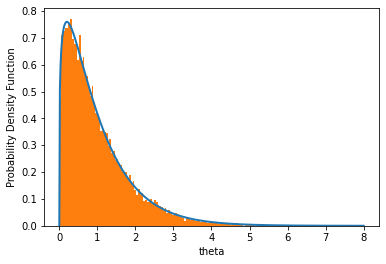

In [27]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.hist(out_gamma1.draws().reshape(6000*4,8)[:,-1], density=True, bins=160)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

#### Constrained parameter

In [22]:
%%writefile code_5.stan
parameters {
  real<lower=0> theta;
}

model {
  theta ~ gamma(1.25, 1.25);
}

Overwriting code_5.stan


In [31]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
print(out_gamma2.diagnose())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |                                                                                                                               | 00:00 Status
chain 2 |                                                                                                                               | 00:00 Status

chain 3 |                                                                                                                               | 00:00 Status


chain 1 |█▊                                                                                                                             | 00:00 Status

chain 3 |█▊                                                                                                                             | 00:00 Status
chain 2 |█▊                                                                                                                             | 00:00 Stat

chain 2 |███████████████████████████████████████████▍                                                | 00:03 Iteration: 3100 / 7000 [ 44%]  (Sampling)


chain 1 |███████████████████████████████████████████▍                                                | 00:03 Iteration: 3100 / 7000 [ 44%]  (Sampling)

chain 3 |████████████████████████████████████████████▋                                               | 00:04 Iteration: 3200 / 7000 [ 45%]  (Sampling)
chain 2 |████████████████████████████████████████████▋                                               | 00:04 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 1 |████████████████████████████████████████████▋                                               | 00:04 Iteration: 3200 / 7000 [ 45%]  (Sampling)

chain 3 |██████████████████████████████████████████████                                              | 00:04 Iteration: 3300 / 7000 [ 47%]  (Sampling)
chain 2 |██████████████████████████████████████████████                                 

chain 2 |███████████████████████████████████████████████████████████████▉                            | 00:06 Iteration: 4700 / 7000 [ 67%]  (Sampling)

chain 3 |███████████████████████████████████████████████████████████████▉                            | 00:06 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |███████████████████████████████████████████████████████████████▉                            | 00:06 Iteration: 4700 / 7000 [ 67%]  (Sampling)

chain 3 |█████████████████████████████████████████████████████████████████▏                          | 00:06 Iteration: 4800 / 7000 [ 68%]  (Sampling)


chain 4 |█████████████████████████████████████████████████████████████████▏                          | 00:06 Iteration: 4800 / 7000 [ 68%]  (Sampling)
chain 1 |█████████████████████████████████████████████████████████████████▏                          | 00:06 Iteration: 4800 / 7000 [ 68%]  (Sampling)

chain 3 |██████████████████████████████████████████████████████████████████▍           

chain 2 |███████████████████████████████████████████████████████████████████████████████████         | 00:09 Iteration: 6200 / 7000 [ 88%]  (Sampling)

chain 3 |████████████████████████████████████████████████████████████████████████████████████▎       | 00:09 Iteration: 6300 / 7000 [ 90%]  (Sampling)


chain 4 |████████████████████████████████████████████████████████████████████████████████████▎       | 00:09 Iteration: 6300 / 7000 [ 90%]  (Sampling)
chain 1 |████████████████████████████████████████████████████████████████████████████████████▎       | 00:09 Iteration: 6300 / 7000 [ 90%]  (Sampling)

chain 3 |█████████████████████████████████████████████████████████████████████████████████████▌      | 00:09 Iteration: 6400 / 7000 [ 91%]  (Sampling)


chain 4 |█████████████████████████████████████████████████████████████████████████████████████▌      | 00:09 Iteration: 6400 / 7000 [ 91%]  (Sampling)
chain 1 |███████████████████████████████████████████████████████████████████████████████


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /home/samples/code_5-20230320072339_1.csv, /home/samples/code_5-20230320072339_2.csv, /home/samples/code_5-20230320072339_3.csv, /home/samples/code_5-20230320072339_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



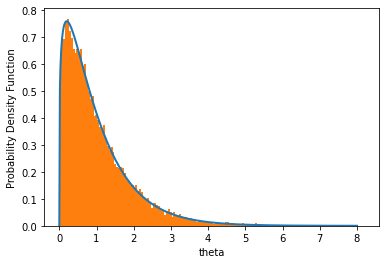

In [28]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.hist(out_gamma2.draws().reshape(6000*4,8)[:,-1], density=True, bins=160)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

The diagnostic message for the unconstrained parameters model suggests that the Hamiltonian Monte Carlo algorithm was unable to generate a valid sample around 39% of the time. This can lead to biased or inefficient estimates of the posterior distribution. After appling constraints no issues with sampling were encountered.

### Excercise 4 - Selection of parameters using equation solving

In [39]:
%%writefile code_6.stan
functions {
    vector tail_delta(vector y, vector theta, real[] x_r, int[] x_i) {
        vector[1] deltas;
        deltas[1] = 2 * (normal_cdf(theta[1], 0, exp(y[1])) - 0.5) - 0.99;
        return deltas;
    }
}
data {
    vector[1] y_guess;
    vector[1] theta;
}

transformed data {
    vector[1] y;
    real x_r[0];
    int x_i[0];
    
    y = algebra_solver(tail_delta, y_guess, theta, x_r, x_i, );
    
    print("Standard deviation = ", exp(y[1]));
}

generated quantities {
    real sigma = exp(y[1]);
}

Overwriting code_6.stan


In [44]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [55]:
print(f"Standard deviation of half_normal distribution such that with 99% probability samples from it will be less than {(F+L)/2} is {tunes.draws()[0][0][-1]}")

Standard deviation of half_normal distribution such that with 99% probability samples from it will be less than 6.0 is 2.32935


### Excercise 5 - different methods of defining models

In [56]:
%%writefile code_7.stan
data {
    int<lower=1> N;
}

parameters {
    real y[N];
    real theta;
}

model {
    y ~ normal(theta, 1);
    theta ~ normal(0, 1);
}

Writing code_7.stan


In [57]:
%%writefile code_8.stan
data {
    int<lower=1> N;
}

parameters {
    real y[N];
    real theta;
}

model {
    target += normal_lpdf(y | theta, 1);
    target += normal_lpdf(theta | 0, 1);
}

Writing code_8.stan


In [59]:
%%writefile code_9.stan
data {
    int<lower=1> N;
}

parameters {
    real y[N];
    real theta;
}

model {
    for (n in 1:N) {
     target += normal_lpdf(y[n] | theta, 1);   
    }
    target += normal_lpdf(theta | 0, 1);
}

Overwriting code_9.stan


In [61]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 21041999
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |                                                                                                                               | 00:00 Status
chain 2 |                                                                                                                               | 00:00 Status

chain 3 |                                                                                                                               | 00:00 Status


chain 1 |█████▊                                                                                                                         | 00:00 Status
chain 2 |█████▊                                                                                                                         | 00:00 Status

chain 3 |█████▊                           


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |                                                                                                                               | 00:00 Status
chain 2 |                                                                                                                               | 00:00 Status

chain 3 |                                                                                                                               | 00:00 Status


chain 1 |█████▊                                                                                                                         | 00:00 Status
chain 2 |█████▊                                                                                                                         | 00:00 Status

chain 3 |█████▊                                                                                                                         | 00:00 Status


chain 1 |█████████████████████▎                 

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |                                                                                                                               | 00:00 Status
chain 2 |                                                                                                                               | 00:00 Status

chain 3 |                                                                                                                               | 00:00 Status


chain 1 |█████▊                                                                                                                         | 00:00 Status
chain 2 |█████▊                                                                                                                         | 00:00 Status


chain 4 |█████▊                                                                                                                         | 00:00 Status

chain 1 |█████████████████████▎                 

INFO:cmdstanpy:CmdStan done processing.


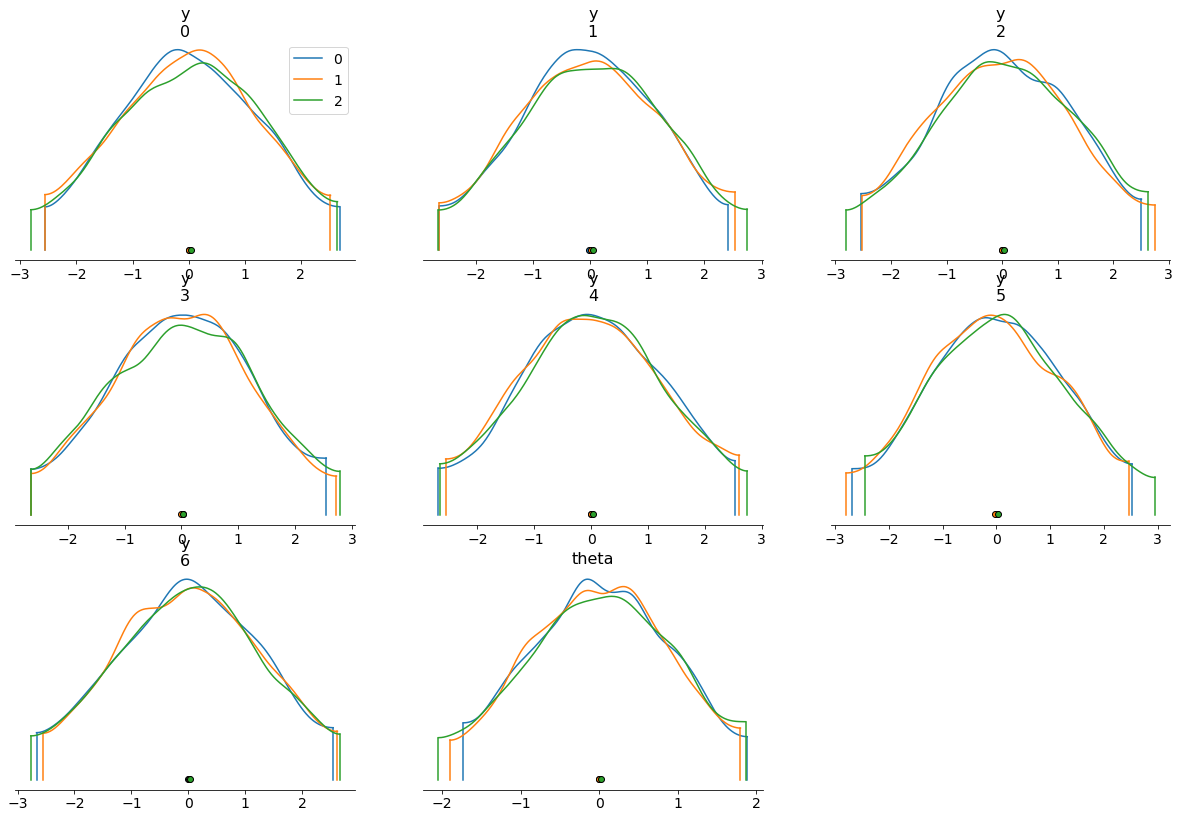

In [62]:
az.plot_density([result_1,result_2,result_3])
plt.show()

### Excercise 6 - generated quantities post sampling

In [63]:
%%writefile code_10.stan
data {
    int<lower=1> N;
}

parameters {
    real y[N];
    real theta;
}

model {
    y ~ normal(theta, 1);
    theta ~ normal(0, 1);
}

generated quantities {
    real mean_y = mean(y);
}

Writing code_10.stan


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [2] done processing


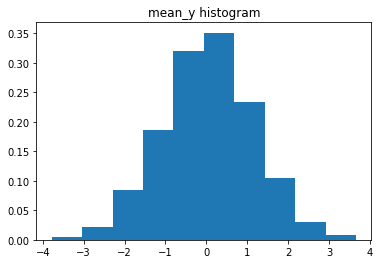

In [75]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample=result_3)
# investigate the output and plot histogram of mean_y variable
plt.hist(mean_of_y.draws_pd()['mean_y'], density=True)
plt.title('mean_y histogram')
plt.show()